# 簡介

## RAG 和 DSF 的比較

| 特性 | Retrieval-Augmented Generation (RAG) | Domain-Specific Fine-tuning (DSF) |
|---|---|---|
| **基本概念** |  利用外部知識庫增強 LLM，無需重新訓練模型。 | 微調預先訓練好的 LLM，使其適應特定任務。 |
| **運作方式** | 根據使用者查詢，檢索相關資訊並整合到提示中，讓 LLM 生成更準確的回應。 | 在更窄的資料集上進一步訓練 LLM，使其適應特定應用。 |
| **優點** | * 節省時間和資源，無需重新訓練模型。  * 能使用最新資料，提高回應的準確性和關聯性。 * 適合需要大量更新資料的應用場景，例如醫療研究、法律分析和技術支援。 | * 針對特定領域或任務進行最佳化，提供高度準確和專業的回應。 * 理解特定領域的術語和上下文，適用於命名實體辨識、情感分析等任務。 |
| **缺點** | * 依賴檢索資料的品質，可能影響回應品質。 * 需要處理檢索結果中的噪音和干擾資訊。 | * 微調過程耗時且資源密集，需要高水準的 NLP 和深度學習知識。 * 模型效能受限於訓練資料，可能導致模型表現不佳。 |
| **技術支援場景** |  可檢索最新的技術手冊和指南，提供即時解決方案。例如，提供特定軟體錯誤的解決步驟。 |  更能理解技術術語和特定問題的上下文，提供更專業和準確的答案。例如，辨識和理解各種錯誤程式，提供針對性解決方案。 |
| **法律分析場景** | 可檢索最新的法律條文和案例，幫助律師快速找到相關資訊。例如，提供某個案件的最新判例和相關法律檔案。 |  專門針對法律語言和結構進行最佳化，提供更準確的法律解讀和分析。例如，更好地處理法律文字中的專業術語和法律邏輯。 |
| **適用情境** |  需要即時查詢和使用大量最新資料的情境。 |  需要高精度和專業知識的特定領域任務。 |

**總結:**

RAG 和 DSF 都是增強 LLM 效能的有效方法，但它們各有優缺點，適用於不同的情境。 RAG 適合需要快速訪問最新資訊的應用，而 DSF 適合需要高度專業化和準確性的任務。 選擇哪種方法取決於具體的需求和資源。 


<hr>

## RAG 的執行架構
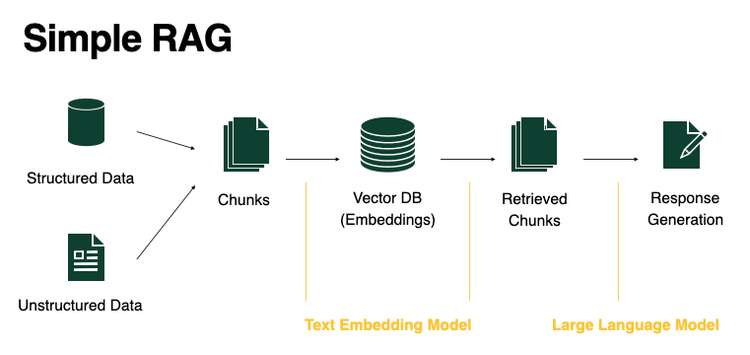
<hr>

## LlamaIndex 的簡介


LlamaIndex 是一個旨在增強大型語言模型 (LLM) 功能的進階協調框架。 雖然 LLM 經過大量公開數據集的訓練，本身功能強大，但它們通常缺乏與私人或特定領域數據交互的方法。LlamaIndex 正是彌合了這一差距，它提供了一種結構化的方式來攝取、組織和利用各種數據源，包括 API、數據庫和 PDF。通過將這些數據索引成針對 LLM 優化的格式，LlamaIndex 促進了自然語言查詢，使用戶能夠與其私人數據進行無縫對話，而無需重新訓練模型。

LlamaIndex 具有以下主要功能和應用：

* **數據攝取**: LlamaIndex 允許將現有數據源（API、PDF、文檔、SQL 等）以各種格式連接到 LLM 應用程式。
* **數據索引**: 它提供了為不同用例存儲和索引數據所需的工具，並與下游向量存儲和數據庫提供者集成。
* **查詢介面**: LlamaIndex 提供了一個查詢介面，它接受任何關於數據的輸入提示，並返回一個知識增強的響應。

LlamaIndex 適用於各種應用場景，例如：

* **文檔問答**: LlamaIndex 可用於構建從非結構化數據（如 PDF、PPT、網頁和圖像）中檢索答案的應用程式。
* **數據增強聊天機器人**: 它有助於創建能夠在知識庫上進行對話的聊天機器人。
* **知識代理**: LlamaIndex 幫助索引知識庫和任務列表，以構建自動決策機器。
* **結構化分析**: 用戶可以使用自然語言查詢其結構化數據倉庫。

LlamaIndex 和 LangChain 都是基於 AI 和 ML 的語言處理工具，但它們的核心目標不同。LangChain 具有多功能性和基礎性，允許更廣泛的應用。相反，LlamaIndex 採用獨特的文檔搜索和摘要方法，可以被視為一種專門的工具，可能建立在 LangChain 等框架之上，以提供其獨特的功能。

<hr>

## llamaindex的執行架構

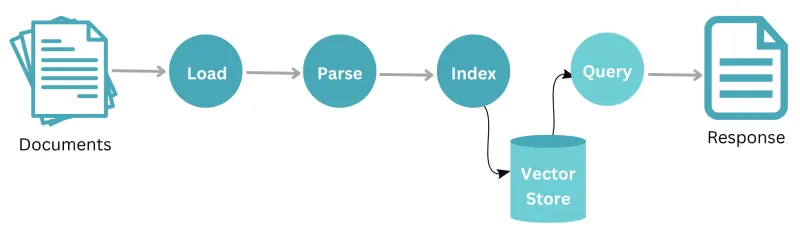

<hr>

# 簡單範例

## 範例一：簡單的RAG從頭開始

1. 載入資料，成為documents物件
2. 建立向量索引
3. 建立查詢引擎
4. 進行查詢
   


In [25]:
#pip install llama-index

import os
from dotenv import load_dotenv
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, Settings
from llama_index.llms.openai import OpenAI

load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

Settings.llm = OpenAI(model="gpt-4o-mini", temperature=0.7)

# 載入資料
documents = SimpleDirectoryReader("議程").load_data()
# 建立向量索引
index = VectorStoreIndex.from_documents(documents)
# 建立查詢引擎
query_engine = index.as_query_engine()

# 進行查詢
response = query_engine.query("主講人是誰 使用md顯示")

print(response)


```md
- 專題演講一：王建全（敬邀中）
- 專題演講二：期交所代表（敬邀中）
- 專題演講三：黃思皓（敬邀中）
- 主題座談與談人：
  - 期交所代表（敬邀中）
  - 張傳章（敬邀中）
  - 王建全（敬邀中）
  - 黃思皓（敬邀中）
- 論文發表主持人：
  - 蔡蒔銓
  - 楊曉文
```


1. 載入資料，成為documents物件 （已完成）
2. 建立向量索引 （已完成）
3. 存檔
4. 取出向量資料
5. 將向量資料轉成索引
6. 將索引建立查詢引擎
7. 進行查詢
   

In [26]:

index_存檔位置='index_store_議程'

# 已載入資料

# 已建立向量索引


# index存檔
index.storage_context.persist(persist_dir=index_存檔位置)




In [27]:
# 下次使用不需再載入資料，只需取出向量資料，並將向量資料轉成索引，再建立查詢引擎

from llama_index.core import StorageContext, load_index_from_storage

# 取出向量資料
storage_context = StorageContext.from_defaults(persist_dir=index_存檔位置)

# 將向量資料轉成索引
index = load_index_from_storage(storage_context)

# 建立查詢引擎
query_engine = index.as_query_engine()

# 進行查詢
response = query_engine.query("主講人是誰 使用md顯示")

print(response)


```md
**主講人**:
- 專題演講一: 王建全 (中華經濟研究院副院長)
- 專題演講二: 期交所代表 (敬邀中)
- 專題演講三: 黃思皓 (陽明交大金融科技創新研究中心主任)
- 主題座談: 
  - 主持人: 賀靜萍 (工商時報總編輯)
  - 與談人:
    - 期交所代表 (敬邀中)
    - 張傳章 (證基會董事長)
    - 王建全 (中華經濟研究院副院長)
    - 黃思皓 (陽明交大金融科技創新研究中心主任)
```


## 範例二：將index存檔後，往後直接取出向量資料，並將向量資料轉成索引，再建立查詢引擎

In [29]:
# 載入資料
documents = SimpleDirectoryReader("帳單").load_data()



In [30]:
index_存檔位置='index_store_帳單'
# 建立向量索引
index = VectorStoreIndex.from_documents(documents)

# index存檔
index.storage_context.persist(persist_dir=index_存檔位置)


In [31]:

# 下次使用不需再載入資料，只需取出向量資料，並將向量資料轉成索引，再建立查詢引擎
# 重建storage context 
storage_context = StorageContext.from_defaults(persist_dir=index_存檔位置)

# 載入索引
index = load_index_from_storage(storage_context)

# 建立查詢引擎
query_engine = index.as_query_engine()

In [32]:

# 進行查詢
response = query_engine.query("有幾份帳單")

print(response)

response = query_engine.query("分別金額多少 總金額多少")

print(response)

有兩份帳單。
分別金額為 $10.15 USD 和 $10.04 USD，總金額為 $20.19 USD。


## 範例三：增加查詢引擎的返回數量

In [19]:


# 建立查詢引擎 similarity_top_k=3 表示返回3個最相似的文檔
query_engine = index.as_query_engine(similarity_top_k=3)

# 進行查詢
response = query_engine.query("有幾份帳單")

print(response)


response = query_engine.query("分別金額多少 總金額多少")

print(response)

有三份帳單。
分別金額如下：
- Invoice E22DD55C-0037: $10.15 USD
- Invoice E22DD55C-0038: $10.44 USD
- Invoice E22DD55C-0039: $10.04 USD

總金額為 $10.15 + $10.44 + $10.04 = $30.63 USD。


## 詳解 LlamaIndex 的回應合成器

根據提供的資料，回應合成器 (Response Synthesizer) 負責使用使用者查詢和給定的一組文本區塊，從大型語言模型 (LLM) 中生成回應。回應合成器的輸出是一個回應 (Response) 物件。

回應合成器在檢索器從資料庫中檢索節點之後，以及任何節點後處理器運行之後，才會在查詢引擎中使用。

### 回應模式

回應合成器通常透過 `response_mode` 參數設定來指定。LlamaIndex 已經實現了以下幾種回應合成器：

*   **refine:**  透過依序處理每個檢索到的文字區塊來建立和精煉答案。這種模式會為每個節點/檢索到的區塊進行一次獨立的 LLM 呼叫。
    *   第一個區塊會與 `text_qa_template` 提示一起用於查詢。
    *   然後，答案和下一個區塊（以及原始問題）會與 `refine_template` 提示一起用於另一個查詢，依此類推，直到所有區塊都被解析。
    *   如果區塊太大而無法容納在上下文視窗內（考慮提示大小），則會使用 `TokenTextSplitter` 將其分割（允許區塊之間的文字重疊），並且（新的）額外區塊將被視為原始區塊集合的區塊（因此也使用 `refine_template` 進行查詢）。
    *   這種模式適合產生更詳細的答案。
*   **compact** (預設): 類似於 `refine`，但會事先將區塊壓縮（連接），減少 LLM 呼叫次數。
    *   這種模式會將盡可能多的文字（從檢索到的區塊中連接/打包）塞入上下文視窗（考慮 `text_qa_template` 和 `refine_template` 之間的最大提示大小）。
    *   如果文字太長而無法容納在一個提示中，則會使用 `TokenTextSplitter` 將其分割成所需的數量（因此允許文字區塊之間的重疊）。
    *   每個文字部分都被視為一個「區塊」，並傳送到 `refine` 合成器。
    *   簡而言之，它就像 `refine`，但 LLM 呼叫次數更少。
*   **tree_summarize:** 使用 `summary_template` 提示查詢 LLM，次數視需要而定，以便所有連接的區塊都已查詢，產生盡可能多的答案，這些答案本身會遞迴地用作 `tree_summarize` LLM 呼叫中的區塊，依此類推，直到只剩一個區塊，因此只有一個最終答案。
    *   這種模式會盡可能地連接區塊，以使用 `summary_template` 提示適應上下文視窗，並根據需要分割它們（再次使用 `TokenTextSplitter` 和一些文字重疊）。
    *   然後，針對 `summary_template` 查詢每個結果區塊/分割（沒有 *refine* 查詢！），並獲得盡可能多的答案。
    *   如果只有一個答案（因為只有一個區塊），那麼它就是最終答案。
    *   如果有多個答案，則這些答案本身會被視為區塊，並遞迴地傳送到 `tree_summarize` 過程（連接/分割以適應/查詢）。
    *   這種模式適合用於摘要目的。
*   **simple_summarize:** 將所有文字區塊截斷以適應單個 LLM 提示。這種模式適合快速摘要目的，但由於截斷，可能會遺失細節。
*   **no_text:** 僅運行檢索器以提取將要發送到 LLM 的節點，而實際上不發送它們。然後可以通過檢查 `response.source_nodes` 來檢查。
*   **context_only:** 返回所有文字區塊的連接字串。
*   **accumulate:** 給定一組文字區塊和查詢，將查詢應用於每個文字區塊，同時將回應累積到一個陣列中。返回所有回應的連接字串。這種模式適合需要分別針對每個文字區塊運行相同查詢的場景。
*   **compact_accumulate:** 與 `accumulate` 相同，但會像 `compact` 一樣「壓縮」每個 LLM 提示，並針對每個文字區塊運行相同的查詢。

### 自訂回應合成器

每個回應合成器都繼承自 `llama_index.response_synthesizers.base.BaseSynthesizer`。基本 API 非常簡單，因此可以輕鬆建立自訂回應合成器。

例如，您可以自訂 `tree_summarize` 中每個步驟使用的模板，或者使用新的研究論文中詳述的新方法來生成對查詢的回應。您可以建立自己的回應合成器，並將其插入任何查詢引擎，或者單獨使用它。

### 使用結構化答案過濾

當使用 `refine` 或 `compact` 回應合成模組時，您可以嘗試使用 `structured_answer_filtering` 選項。

將 `structured_answer_filtering` 設定為 `True` 時，`refine` 模組可以過濾掉與所問問題無關的任何輸入節點。這對於基於 RAG 的問答系統特別有用，這些系統需要從外部向量儲存庫中檢索給定使用者查詢的文字區塊。

### 使用自訂提示模板（包含額外變數）

您可能希望自訂回應合成器中使用的提示，並在查詢時新增額外變數。您可以在 `get_response` 的 `**kwargs` 中指定這些額外變數。

### 模組

有關更多詳細資訊，請參閱完整的模組指南。
<hr>

# 模組細節
https://docs.llamaindex.ai/en/v0.10.17/index.html


## 模組：models

1. LLMs
2. Embeddings
3. MultiModal

https://docs.llamaindex.ai/en/stable/module_guides/models/


<hr>

## 模組：dataloader

1. Simple Directory Reader
2. Psychic Reader
3. Deeplake Reader
4. Qdrant Reader
5. Discord Reader
6. MongoDB Reader
7. Chroma Reader
8. MyScale Reader
9. FAISS Reader
10. Obsidian Reader
11. Slack Reader
12. Webpage Reader
13. Pinecone Reader
14. Pathway Reader
15. MBox Reader
16. Milvus Reader
17. Notion Reader
18. Github Reader
19. Google Docs Reader
20. Database Reader
21. Twitter Reader
22. Weaviate Reader
23. Make Reader
24. Deplot Reader
25. Docling Reader

https://docs.llamaindex.ai/en/stable/module_guides/loading/connector/modules/

<hr>

## 模組：index
1. Vector Store Index
2. Summary Index
3. Tree Index
4. Keyword Table Index
5. Knowledge Graph Index
6. Knowledge Graph Query Engine
7. Knoweldge Graph RAG Query Engine
8. REBEL + Knowledge Graph Index
9. REBEL + Wikipedia Filtering
10. SQL Query Engine
11. DuckDB Query Engine
12. Document Summary Index
13. Object Index
    
https://docs.llamaindex.ai/en/stable/module_guides/indexing/modules/

<hr>

## 模組：Query
1. Query Engines:https://docs.llamaindex.ai/en/stable/module_guides/deploying/query_engine/modules/<br>
(1) 基本使用<br>
(2) response mode:https://docs.llamaindex.ai/en/stable/module_guides/deploying/query_engine/response_modes/<br>
2. Chat Engines 
3. Agents
4. Retrievers:https://docs.llamaindex.ai/en/stable/module_guides/querying/retriever/retriever_modes/
5. Response Synthesizers
6. Routers
7. Node Postprocessors
8. Structured Outputs

https://docs.llamaindex.ai/en/stable/module_guides/querying/
<hr>

# 常用模組


## 不同 Index 的比較

| 索引類型 | 運作方式 | 查詢方式 | 優點 | 缺點 | 適用場景 |
|---|---|---|---|---|---|
| 總結索引 (Summary Index) | 將節點儲存為一個序列鏈。 |  載入所有節點或使用基於嵌入的查詢來獲取最相似的 k 個節點，也可添加關鍵字過濾器。 | 簡單易用。 | 查詢效率可能較低，尤其是在大型數據集上。 | 適用於數據量較小且查詢需求簡單的場景。 |
| 向量儲存索引 (Vector Store Index) | 將每個節點及其對應的嵌入儲存在向量儲存庫中。 | 獲取最相似的 k 個節點。 | 查詢效率高，適合大型數據集。 | 需要計算和儲存嵌入，可能需要額外的資源。 | 適用於數據量較大且需要快速查詢的場景。 |
| 樹狀索引 (Tree Index) | 從一組節點構建一個層次樹。 | 從根節點遍歷到葉節點，可以選擇一個或多個子節點。 | 可以有效地組織和查詢層次結構數據。 | 構建樹狀結構可能較為複雜。 | 適用於具有層次結構的數據，例如文件目錄或組織架構。 |
| 關鍵字表索引 (Keyword Table Index) | 從每個節點中提取關鍵字，並建立從每個關鍵字到相應節點的映射。 | 從查詢中提取相關關鍵字，並匹配預先提取的節點關鍵字以獲取相應的節點。 | 簡單易用，查詢效率高。 | 關鍵字提取的準確性會影響查詢結果。 | 適用於關鍵字明確且查詢主要基於關鍵字匹配的場景。 |
| 屬性圖索引 (Property Graph Index) | 構建一個包含標記節點和關係的知識圖譜，可以嵌入節點以供檢索。 | 使用關鍵字和同義詞擴展以及向量檢索（如果圖已嵌入）來檢索相關的三元組，也可以包含原始文字。 | 可以有效地組織和查詢複雜的關係數據。 | 構建知識圖譜可能較為複雜，需要額外的資源來儲存和查詢圖數據。 | 適用於需要查詢複雜關係的場景，例如知識圖譜問答或社交網絡分析。 | 
<hr>


## Retriever （檢索器）
1. 要與index配合使用，用來檢索資料
2. 特殊進階檢索器

**Vector Index**
* VectorIndexRetriever

**Summary Index**
* default: SummaryIndexRetriever
* embedding: SummaryIndexEmbeddingRetriever
* llm: SummaryIndexLLMRetriever

**Tree Index**
* select_leaf: TreeSelectLeafRetriever
* select_leaf_embedding: TreeSelectLeafEmbeddingRetriever
* all_leaf: TreeAllLeafRetriever
* root: TreeRootRetriever

**Keyword Table Index**
* default: KeywordTableGPTRetriever
* simple: KeywordTableSimpleRetriever
* rake: KeywordTableRAKERetriever

**Knowledge Graph Index**
* keyword: KGTableRetriever
* embedding: KGTableRetriever
* hybrid: KGTableRetriever

**Document Summary Index**
* llm: DocumentSummaryIndexLLMRetriever
* embedding: DocumentSummaryIndexEmbeddingRetrievers

https://docs.llamaindex.ai/en/stable/module_guides/querying/retriever/retriever_modes/


## query engine 回應模式比較

| 回應模式 | 運作方式 | 優點 | 缺點 | 適用場景 |
|---|---|---|---|---|
| **refine** | * 循序處理每個檢索到的文字區塊，為答案建立和精煉過程。 * 每個節點/檢索到的區塊都會進行一次獨立的 LLM 呼叫。 * 第一個區塊會與 `text_qa_template` 提示一起用於查詢。 * 然後，答案和下一個區塊（以及原始問題）會與 `refine_template` 提示一起用於另一個查詢，依此類推，直到所有區塊都被解析。 * 如果區塊太大而無法容納在視窗內（考慮提示大小），則會使用 `TokenTextSplitter` 將其分割（允許區塊之間的文字重疊），並且（新的）額外區塊將被視為原始區塊集合的區塊（因此也使用 `refine_template` 進行查詢）。 | 適合產生更詳細的答案。 | 可能需要多次 LLM 呼叫，導致回應時間較長。 | 需要深入分析和整合多個文字區塊以提供詳細答案的場景。 |
| **compact** (預設) | * 類似於 `refine`，但會事先將區塊壓縮（連接），減少 LLM 呼叫次數。 * 將盡可能多的文字（從檢索到的區塊中連接/打包）塞入上下文視窗（考慮 `text_qa_template` 和 `refine_template` 之間的最大提示大小）。 * 如果文字太長而無法容納在一個提示中，則會使用 `TokenTextSplitter` 將其分割成所需的數量（因此允許文字區塊之間的重疊）。 * 每個文字部分都被視為一個「區塊」，並傳送到 `refine` 合成器。 * 簡而言之，它就像 `refine`，但 LLM 呼叫次數更少。 | 可以減少 LLM 呼叫次數，提高回應速度。 |  | 適用於需要快速回應且答案不需要過於詳細的場景。 |
| **tree_summarize** | * 使用 `summary_template` 提示查詢 LLM，次數視需要而定，以便所有連接的區塊都已查詢，產生盡可能多的答案，這些答案本身會遞迴地用作 `tree_summarize` LLM 呼叫中的區塊，依此類推，直到只剩下一 個區塊，因此只有一個最終答案。 * 盡可能地連接區塊，以使用 `summary_template` 提示適應上下文視窗，並根據需要分割它們（再次使用 `TokenTextSplitter` 和一些文字重疊）。 * 然後，針對 `summary_template` 查詢每個結果區塊/分割（沒有 *refine* 查詢！），並獲得盡可能多的答案。 * 如果只有一個答案（因為只有一個區塊），那麼它就是最終答案。 * 如果有多個答案，則這些答案本身會被視為區塊，並遞迴地傳送到 `tree_summarize` 過程（連接/分割以適應/查詢）。 | 適合用於摘要目的。 |  | 適用於需要將大量資訊濃縮成簡潔摘要的場景。 |
| **simple_summarize** | *  將所有文字區塊截斷以適應單個 LLM 提示。 | 適合快速摘要目的。 | 由於截斷，可能會遺失細節。 | 適用於需要快速獲取資訊概要且不介意遺失部分細節的場景。 |
| **no_text** | * 僅運行檢索器以提取將要發送到 LLM 的節點，而實際上不發送它們。 * 然後可以通過檢查 `response.source_nodes` 來檢查。 | 適用於僅需要識別相關資訊來源，而不需要生成完整答案的場景。 | 不會產生完整的答案。 | 適用於需要快速識別相關資訊來源，例如進行初步研究或資訊收集的場景。 |
| **accumulate** | * 給定一組文字區塊和查詢，將查詢應用於每個文字區塊，同時將回應累積到一個陣列中。 * 返回所有回應的連接字串。 | 適合需要分別針對每個文字區塊運行相同查詢的場景。 |  | 適用於需要對多個資料來源進行相同分析或查詢的場景。 |
| **compact_accumulate** | *  與 `accumulate` 相同，但會像 `compact` 一樣「壓縮」每個 LLM 提示，並針對每個文字區塊運行相同的查詢。 | 可以減少 LLM 呼叫次數，提高回應速度。 |  | 適用於需要快速回應且需要對多個資料來源進行相同分析或查詢的場景。 |

**總結:**

LlamaIndex 提供了多種回應模式，每種模式都有其自身的優缺點，適用於不同的場景。選擇哪種模式取決於您的查詢需求、對回應速度和詳細程度的要求，以及可用的計算資源等因素。 
<hr>

## 綜合應用範例（台積電股東會逐字稿）   

In [39]:
# 導入必要的索引類型
# VectorStoreIndex: 用於建立向量索引,適合相似度搜尋
# SummaryIndex: 用於建立總結索引,適合生成摘要
from llama_index.core import SummaryIndex,VectorStoreIndex

# 使用SimpleDirectoryReader讀取指定資料夾中的文件
# input_dir="大量文字": 指定要讀取的資料夾路徑
# load_data(): 載入資料夾中的所有文件
台積電資料=SimpleDirectoryReader(input_dir="大量文字").load_data()

# 使用VectorStoreIndex建立向量索引
# from_documents(): 從文件建立索引
# persist(): 將索引儲存到指定目錄
index=VectorStoreIndex.from_documents(台積電資料)
index.storage_context.persist(persist_dir="index_store_台積電資料_vector")

# 使用SummaryIndex建立總結索引
# from_documents(): 從文件建立索引
# persist(): 將索引儲存到指定目錄
index=SummaryIndex.from_documents(台積電資料)
index.storage_context.persist(persist_dir="index_store_台積電資料_summary")


In [48]:
# 導入必要的模組
from llama_index.core import load_index_from_storage

# 導入檢索器和查詢引擎相關模組
from llama_index.core.retrievers import VectorIndexRetriever,SummaryIndexRetriever
from llama_index.core.query_engine import RetrieverQueryEngine

# 從儲存的檔案載入向量索引和總結索引
# 向量索引適合相似度搜尋,總結索引適合生成摘要
index_vector=load_index_from_storage(StorageContext.from_defaults(persist_dir="index_store_台積電資料_vector"))
index_summary=load_index_from_storage(StorageContext.from_defaults(persist_dir="index_store_台積電資料_summary"))

# 建立檢索器實例
# similarity_top_k=3 表示每次檢索返回最相關的前3個結果
retriever_vector=VectorIndexRetriever(index=index_vector, similarity_top_k=3)
retriever_summary=SummaryIndexRetriever(index=index_summary, similarity_top_k=3)

# 建立查詢引擎
# 將檢索器和LLM模型整合成查詢引擎
query_engine_vector=RetrieverQueryEngine.from_args(retriever=retriever_vector, 
                                                   response_mode="compact")
query_engine_summary=RetrieverQueryEngine.from_args(retriever=retriever_summary,
                                                    response_mode="compact")

# 執行查詢
# 分別使用向量索引和總結索引進行相同的查詢
response_vector=query_engine_vector.query("用繁體中文彙整重點?")
response_summary=query_engine_summary.query("用繁體中文彙整重點?")

# 導入表格美化模組
from tabulate import tabulate

# 準備表格數據
# 將兩種索引的查詢結果整理成表格形式
table_data = [
    ["索引類型", "回應內容"],
    ["向量索引", str(response_vector)],
    ["總結索引", str(response_summary)]
]

# 使用tabulate生成美化後的表格
# headers="firstrow"表示使用第一行作為表頭
# tablefmt="grid"表示使用網格樣式
table = tabulate(table_data, headers="firstrow", tablefmt="grid")
print("\n比較結果:")
print(table)

# # 原始的輸出方式(已註解)
# print(f"向量索引:{response_vector}")
# print(f"總結索引:{response_summary}")


# 導入 gradio 模組
import gradio as gr

# 定義查詢函數
def query_indexes(query_text):
    # 使用兩種索引進行查詢
    response_vector = query_engine_vector.query(query_text)
    response_summary = query_engine_summary.query(query_text)
    
    # 準備回應內容
    result = f"""
👉向量索引查詢結果:
{str(response_vector)}

👉總結索引查詢結果:
{str(response_summary)}
"""
    return result

# 建立 Gradio 介面
demo = gr.Interface(
    fn=query_indexes,
    inputs=gr.Textbox(lines=2, placeholder="請輸入您的查詢..."),
    outputs=gr.Textbox(label="查詢結果"),
    title="台積電資料查詢系統",
    description="這個系統使用向量索引和總結索引兩種方式來查詢台積電相關資料。",
)

# 啟動 Gradio 介面
demo.launch(share=True)



比較結果:
+------------+----------------------------------------------------------------------------------------------------------------------+
| 索引類型   | 回應內容                                                                                                             |
+============+======================================================================================================================+
| 向量索引   | 1. TSMC的價值銷售是一個持續進行的過程，將所有客戶視為合作夥伴，目標是促進客戶在市場上的成功。                        |
|            |                                                                                                                      |
|            | 2. TSMC的毛利率雖然高於許多客戶，但仍然存在與設備供應商之間的合作關係，而非單純的議價能力。                          |
|            |                                                                                                                      |
|            | 3. 對於反壟斷的擔憂，TSMC認為其市場佔有率並不構成壟斷，並指出公司正在進行的Foundry 2.0計劃是其可服務市場的更好反映。 |
|            |                                                     

## 進階用法：Metadat Filter


In [81]:
# 導入必要的模組
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.core.retrievers import VectorIndexRetriever

# 1. 讀取文件並創建索引
# 從指定目錄讀取文件資料
documents = SimpleDirectoryReader('大量文字').load_data()
# 建立向量索引
index = VectorStoreIndex.from_documents(documents)

# 2. 創建和配置檢索器
# 設定檢索器,指定返回最相關的前5個文件

similarity_top_k=10

retriever = VectorIndexRetriever(
    index=index,
    similarity_top_k=similarity_top_k,  # 返回最相關的similarity_top_k個文檔
)

# 3. 執行檢索
# 設定查詢問題
query = "匯總本季資訊"
# 進行檢索
nodes = retriever.retrieve(query)
      
# 4. 處理檢索結果
# 遍歷每個檢索到的節點
print(f"👉取出的{similarity_top_k}個節點內容，請注意metadata\n\n")
for node in nodes:
    print(f"節點相似度分數: {node.score}")  # 輸出相關性分數
    print(f"節點內容: {node.node.text[0:100]}\n")  # 輸出檢索到的文本內容前20個字
    print(node.node.metadata)  # 輸出節點的元數據
    
# 使用檢索到的所有文字塊建立查詢引擎
query_engine_vector = RetrieverQueryEngine.from_args(
    retriever=retriever, 
    response_mode="compact"  # 使用簡潔模式輸出
)
# 執行查詢
response = query_engine_vector.query(query)

print(f"👉使用{similarity_top_k}個節點查詢結果:\n")
print(response)

print("########################################################")

# 導入元數據過濾相關的模組
from llama_index.core.vector_stores import (
    MetadataFilter,
    MetadataFilters,
    FilterOperator,
)

# 創建元數據過濾器
# 這裡設定只檢索檔名包含"2Q24"的文件
filters = MetadataFilters(
    filters=[
        MetadataFilter(
            key="file_name",  # 過濾的鍵值為檔案名稱
            operator=FilterOperator.TEXT_MATCH,  # 使用文字匹配運算符
            value="2Q24"  # 匹配的值
        ),
    ]
)

# 建立進階檢索器
retriever = index.as_retriever(
    dense_similarity_top_k=5,  # 密集檢索返回前5個結果
    sparse_similarity_top_k=5,  # 稀疏檢索返回前5個結果
    alpha=0.5,  # 密集和稀疏檢索的權重比例
    enable_reranking=True,  # 啟用重新排序
    rerank_top_n=5,  # 重新排序前5個結果
    filters=filters,  # 套用元數據過濾器
)

# 使用過濾後的檢索器建立新的查詢引擎
query_engine_vector = RetrieverQueryEngine.from_args(
    retriever=retriever, 
    response_mode="compact"
)
# 執行過濾後的查詢
response = query_engine_vector.query(query)
print(f"👉使用file_name過濾2Q24後的檢索器查詢結果:\n\n")
print(response)


取出的10個節點內容，請注意metadata


節點相似度分數: 0.7914156911517942
節點內容: Due to the operating leverage, total operating expense accounted for 10.5% of net revenue, as compar

{'page_label': '3', 'file_name': 'TSMC 2Q24 Transcript.pdf', 'file_path': '/Users/apple/Dropbox/AI工作坊/簡單RAG/大量文字/TSMC 2Q24 Transcript.pdf', 'file_type': 'application/pdf', 'file_size': 211022, 'creation_date': '2024-12-13', 'last_modified_date': '2024-12-13'}
節點相似度分數: 0.7784372953505015
節點內容: CORPORATE PARTICIPANTS
Jeff Su Taiwan Semiconductor Manufacturing Co Ltd - Director of Investor Rela

{'page_label': '2', 'file_name': 'TSMC 3Q24 Transcript.pdf', 'file_path': '/Users/apple/Dropbox/AI工作坊/簡單RAG/大量文字/TSMC 3Q24 Transcript.pdf', 'file_type': 'application/pdf', 'file_size': 249445, 'creation_date': '2024-12-13', 'last_modified_date': '2024-12-13'}
節點相似度分數: 0.7747119760384087
節點內容: REFINITIV STREETEVENTS
EDITED TRANSCRIPT
2330.TW - Q2 2024 Taiwan Semiconductor Manufacturing Co Ltd

{'page_label': '1', 'file_name': 'TSMC 2Q24 Tra